**TAREA 1**

En el presente proyecto se presenta la exploracion y visualizacion de datos 
Se toma en cuenta el archivo de daily min temperatures
El cual contiene la informacion de 10 años sobre las temperaturas diarias. 
Este ejericio se realizara una previsualiazacion de los datos

**Paso 1** Carga y previsualizacion de la data original

In [1]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip install torch
#import torch as torch

# Gráficas estadísticas
#import seaborn as sns

In [2]:
#Carga de los datos de costos de viviendas en Melbourne.

df = pd.read_csv('daily-min-temperatures.csv')

print(df)


            Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]


In [3]:
# Columnas que contiene el dataframe
df.columns

Index(['Date', 'Temp'], dtype='object')

**Paso 2** Seguidamente vamos a estandarizar la informacion para que nos quede en una escala del 0 a 1 donde el 0 representa la temperatura mas baja percibida y el 1 la temperatura mas alta. 


In [4]:
#Temperatura indexadacion(Normalizacion)
tempnorm = df['Temp']
maximo=pd.DataFrame.max(tempnorm)
minimo=pd.DataFrame.min(tempnorm)
tempnorm= (tempnorm - minimo)/(maximo-minimo)
print ("El maximo es,",maximo,"El minimo es",minimo)
print (tempnorm)

df['Temp_esz']=tempnorm #agregar la columna estandarizada de datos
del(df['Temp']) #borrar los datos origiales de temperatura para dejar solo los escalados
print(df)

El maximo es, 26.3 El minimo es 0.0
0       0.787072
1       0.680608
2       0.714829
3       0.555133
4       0.600760
          ...   
3645    0.532319
3646    0.517110
3647    0.513308
3648    0.596958
3649    0.494297
Name: Temp, Length: 3650, dtype: float64
            Date  Temp_esz
0     1981-01-01  0.787072
1     1981-01-02  0.680608
2     1981-01-03  0.714829
3     1981-01-04  0.555133
4     1981-01-05  0.600760
...          ...       ...
3645  1990-12-27  0.532319
3646  1990-12-28  0.517110
3647  1990-12-29  0.513308
3648  1990-12-30  0.596958
3649  1990-12-31  0.494297

[3650 rows x 2 columns]


**Paso 3** 
Como la columna que tenemos de fecha esta viene en formato yyyy-mm-dd vamos a dividirla para conseguir los valor separados del año, mes y dia.

In [5]:
years=df['Date']
data =years.str.split("-",n=2, expand=True)

print (data)
data.columns
data.columns=['Year','Month','days']
data['index']=data.index

print (data)

         0   1   2
0     1981  01  01
1     1981  01  02
2     1981  01  03
3     1981  01  04
4     1981  01  05
...    ...  ..  ..
3645  1990  12  27
3646  1990  12  28
3647  1990  12  29
3648  1990  12  30
3649  1990  12  31

[3650 rows x 3 columns]
      Year Month days  index
0     1981    01   01      0
1     1981    01   02      1
2     1981    01   03      2
3     1981    01   04      3
4     1981    01   05      4
...    ...   ...  ...    ...
3645  1990    12   27   3645
3646  1990    12   28   3646
3647  1990    12   29   3647
3648  1990    12   30   3648
3649  1990    12   31   3649

[3650 rows x 4 columns]


In [6]:
#se agrega la columna dias-number la cual nos indica el dia correspondiente del año.
tempDF =data['index']+1-365*(data['index']/365).apply(np.floor)
data["dias_number"]=tempDF
print(data)


      Year Month days  index  dias_number
0     1981    01   01      0          1.0
1     1981    01   02      1          2.0
2     1981    01   03      2          3.0
3     1981    01   04      3          4.0
4     1981    01   05      4          5.0
...    ...   ...  ...    ...          ...
3645  1990    12   27   3645        361.0
3646  1990    12   28   3646        362.0
3647  1990    12   29   3647        363.0
3648  1990    12   30   3648        364.0
3649  1990    12   31   3649        365.0

[3650 rows x 5 columns]


In [7]:
del(data['Month'],data['days'],data['index']) #borrar los datos originales de fechas
print(data)

      Year  dias_number
0     1981          1.0
1     1981          2.0
2     1981          3.0
3     1981          4.0
4     1981          5.0
...    ...          ...
3645  1990        361.0
3646  1990        362.0
3647  1990        363.0
3648  1990        364.0
3649  1990        365.0

[3650 rows x 2 columns]


**Paso 4**
Se agrupan los años por dias, años, temperatura.
En un solo dataframe.

In [8]:
#se crea una dataframe que incluya todo los años para luego separarlos
df['dias_n']=data['dias_number']
df['Year']=data['Year']

print(df)

            Date  Temp_esz  dias_n  Year
0     1981-01-01  0.787072     1.0  1981
1     1981-01-02  0.680608     2.0  1981
2     1981-01-03  0.714829     3.0  1981
3     1981-01-04  0.555133     4.0  1981
4     1981-01-05  0.600760     5.0  1981
...          ...       ...     ...   ...
3645  1990-12-27  0.532319   361.0  1990
3646  1990-12-28  0.517110   362.0  1990
3647  1990-12-29  0.513308   363.0  1990
3648  1990-12-30  0.596958   364.0  1990
3649  1990-12-31  0.494297   365.0  1990

[3650 rows x 4 columns]


**Paso 5**
Se hace una division de la data completa para seleccionar los años

In [33]:
#separar por años
y1981=df[0:364]
y1982=df[365:729]
y1983=df[730:1094]
y1984=df[1095:1459]
y1985=df[1460:1824]
y1986=df[1825:2189]
y1987=df[2190:2554]
y1988=df[2555:2919]
y1989=df[2920:3284]
y1990=df[3285:3649]
#print (y1981,y1982)


0.04430247132843959


**Paso 6**
se hace una distribucion para analizar cada año por separado, en este hemos creado el año 1981  y 1982

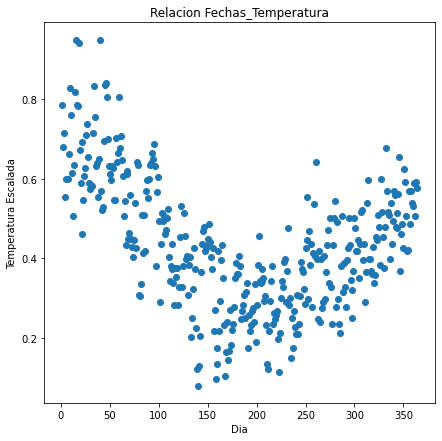

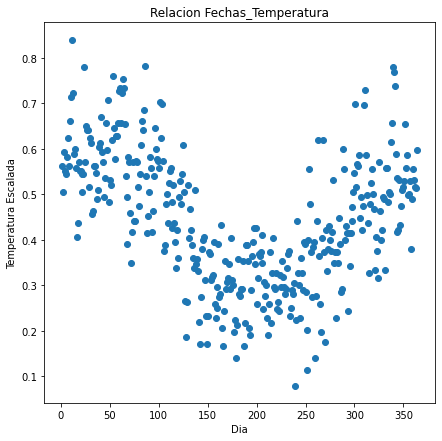

In [10]:
# distribución del precio y el área de construcción.
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(y1981,'dias_n','Temp_esz','Dia','Temperatura Escalada','Relacion Fechas_Temperatura')
plot_data(y1990,'dias_n','Temp_esz','Dia','Temperatura Escalada','Relacion Fechas_Temperatura')

**Paso 7**
Se hace una distribucion de las temperaturas en conjunto para determinar si el comportamiento agrupado es consistente a lo largo de los años

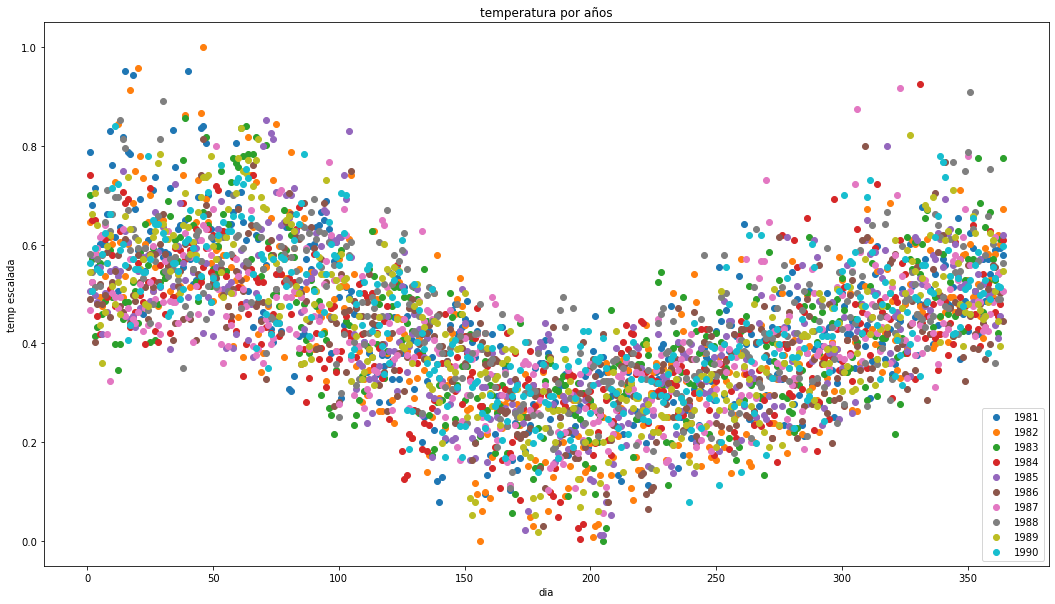

In [12]:
    plt.figure(figsize=(18,10))
    plt.scatter(x=y1981['dias_n'],y=y1981['Temp_esz'],label="1981")
    plt.scatter(x=y1982['dias_n'],y=y1982['Temp_esz'],label="1982")
    plt.scatter(x=y1983['dias_n'],y=y1983['Temp_esz'],label="1983")
    plt.scatter(x=y1984['dias_n'],y=y1984['Temp_esz'],label="1984")
    plt.scatter(x=y1985['dias_n'],y=y1985['Temp_esz'],label="1985")
    plt.scatter(x=y1986['dias_n'],y=y1986['Temp_esz'],label="1986")
    plt.scatter(x=y1987['dias_n'],y=y1987['Temp_esz'],label="1987")
    plt.scatter(x=y1988['dias_n'],y=y1988['Temp_esz'],label="1988")
    plt.scatter(x=y1989['dias_n'],y=y1989['Temp_esz'],label="1989")
    plt.scatter(x=y1990['dias_n'],y=y1990['Temp_esz'],label="1990")
    plt.legend(loc='lower right')
    plt.xlabel("dia")
    plt.ylabel("temp escalada")
    plt.title("temperatura por años")
    plt.show()